# Lesson: Introduction to Pandas 

## Introduction

Pandas is a Python library that provides data structures and data analysis tools. It is designed to make data manipulation and analysis fast and easy. It has excellent tools for reading and writing data between in-memory data structures and different file formats and databases. It also has many tools for data merging, filtering, cleaning, grouping, and transformation. It is built on top of NumPy and leverages its array data structure under the hood.

### Learning Outcomes

When you've finished this lesson and its exercises, you should be able to:

* Understand the basic data structures in Pandas: `Series` and `DataFrame`.
* Read data from files into Pandas DataFrames.
* Inspect data in Pandas DataFrames.
* Use `loc` and `[]` to access data in Pandas DataFrames.
* Select a subset of data in Pandas DataFrames.
* Filter data in Pandas DataFrames.
* Use `apply()` to execute a function on each row or column.


## Pandas Data Structures

Pandas has two main data structures: `Series` and `DataFrame`.

**Series** is a one-dimensional labeled array-like object capable of holding data of any type. Values are labeled with an "index".

**DataFrame** is a two-dimensional labeled data structure with columns of potentially different types. It is a table-like structure composed of columns and rows. The columns are `Series` objects.

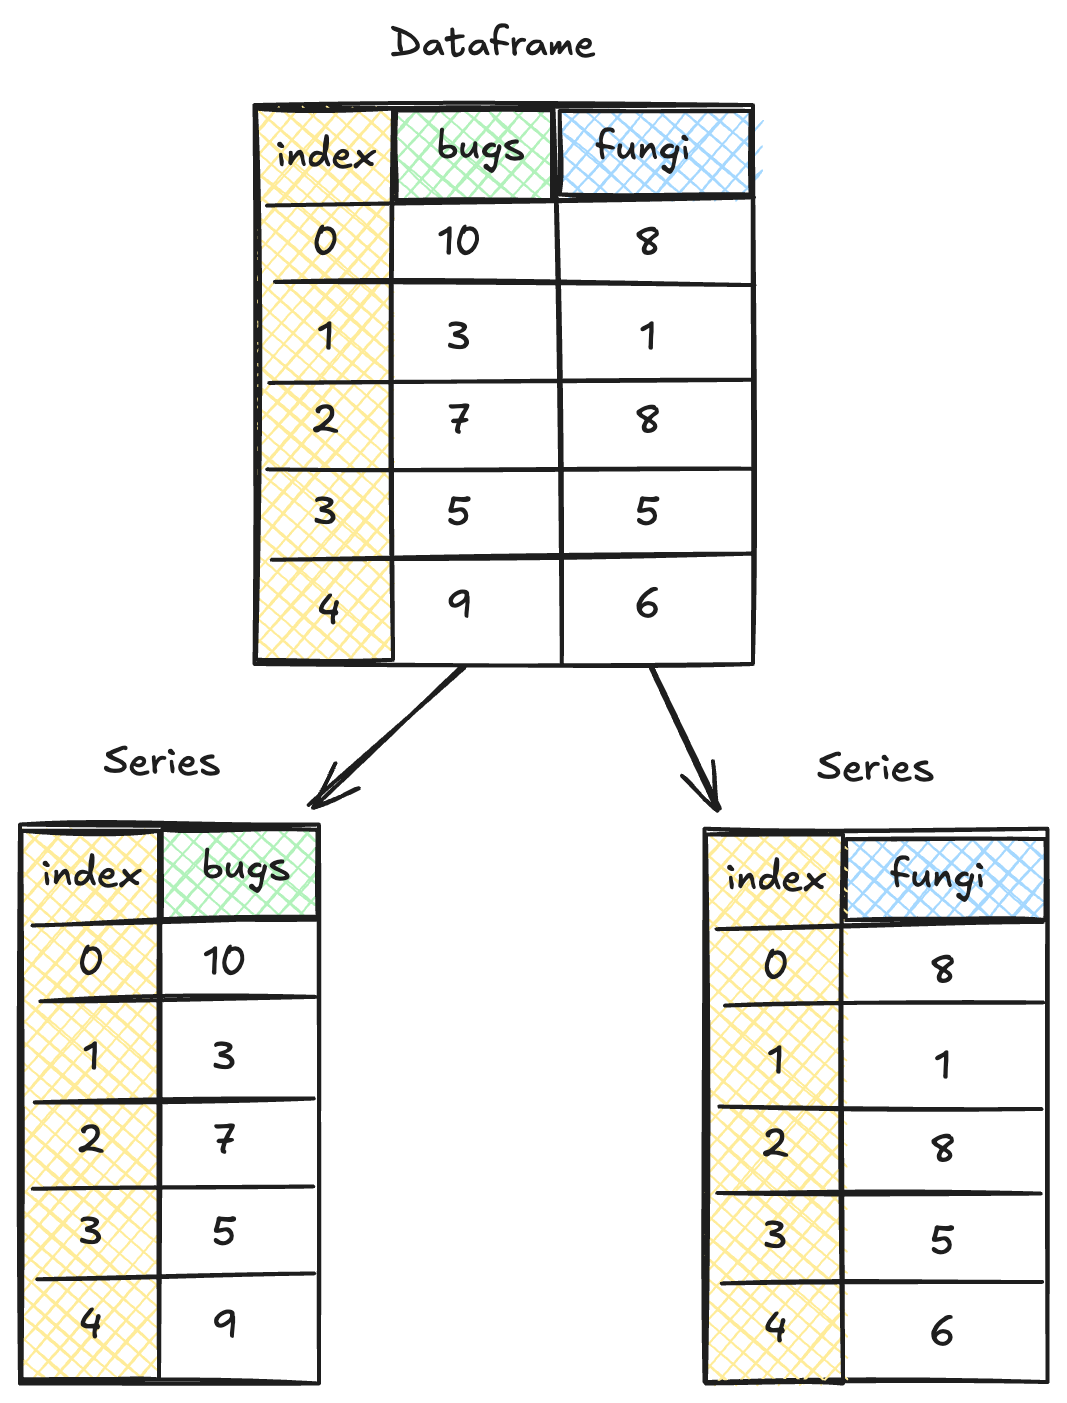

Many of the same operations can be performed on these two data structures, such as filtering, filling in missing data, and calculating statistics.

## Series

A `Series` can be created from an iterable object like a list or a dictionary. 

### Examples

Create a `Series` from a list.

In [1]:
import pandas as pd

In [ ]:
# Create a Series from a list
data = [1, 2, 3, 4, 5]
series = pd.Series(data)
print(series)

Create a `Series` from a dictionary.

In [ ]:
# Create a Series from a dictionary
data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
series = pd.Series(data)
print(series)

The `Series` object has two main attributes: `values` and `index`. The `values` attribute returns the data as a NumPy array. The `index` attribute returns the index as a `RangeIndex` object.

In [ ]:
print(series.values)
print(series.index)

A value can be retrieved from a `Series` by passing the index into the square brackets.

In [ ]:
print(series['c']) # 3

The count of unique values in the `Series` can be accessed using the `value_counts()` method.

In [ ]:
print(series.value_counts())

There are many more methods and attributes available for `Series`. You can find them in the documentation, but we will cover more as we look at `DataFrames`.

## DataFrames

There are many ways to create a `DataFrame`. One way is to use a dictionary of lists. The keys of the dictionary become the column names, and the values become the data in the columns.

In [ ]:
# Create a dictionary
data = {
    'bugs': [10, 3, 7, 5, 9],
    'fungi': [8, 1, 8, 5, 6]
}

# Use the constructor to create a DataFrame
forages = pd.DataFrame(data)
forages.style

The index (0-4) is automatically generated. A more readable index can be assigned by setting the `index` attribute. 

Assign a person's name to each row using the `index` parameter of the `DataFrame` constructor.

In [ ]:
# Use the constructor to create a DataFrame
foragers = ['Jeordie', 'Samantha', 'Mr Pickles', 'Rose', 'Guy']
forages = pd.DataFrame(data, index=foragers)
forages.style

Some quick insights can be gained by using the `shape` attribute to get the dimensions of the `DataFrame`. The `shape` attribute is a tuple with the number of rows and columns.

In [ ]:
forages.shape

### Column Data

Columns can be accessed by passing the column name into the square brackets of the `DataFrame`. This will return a `Series` object. To get multiple columns, pass a list of column names into the square brackets and we will get a `DataFrame`.

In [ ]:
# Get a single column as a Series
print(forages["bugs"])
print(type(forages["bugs"]))
# Get a list of columns
print(forages.columns)
print(forages[["bugs", "fungi"]])
print(type(forages[["bugs", "fungi"]]))

### Row Data

The `loc` attribute is used to access a group of rows and columns by label(s) or a boolean array.

It can be used to get a single row as a `Series` by passing the label of the row into the square brackets. We can get multiple rows as a subset `DataFrame` by passing a list of labels into the square brackets.

In [ ]:
# Get a single row as a Series
print(forages.loc['Jeordie'])
print(type(forages.loc['Jeordie']))
# Get a list of rows
print(forages.loc[['Rose', 'Mr Pickles']])
print(type(forages.loc[['Rose', 'Mr Pickles']]))

## Reading Files

Building a `DataFrame` from a dictionary is useful, but far more often your data will be coming from somewhere _outside_ your code. Pandas has many functions to read data from different sources. One of the most common is reading from a CSV file.

> In our set up lesson, we should have a `mobile_devices.csv` file. Be sure it's in the same directory as `pandas.ipynb`.

In [25]:
mobile_devices = pd.read_csv('mobile_devices.csv')

The `read_csv()` function reads the CSV file and returns a `DataFrame`. It maps the first row of the CSV file to the column names of the `DataFrame`. Many parameters can be passed to `read_csv()`. You can specify the column names, the index column, the delimiter, and many more.

`sep` is used to specify the delimiter. By default, it is a comma. `comment` is used to specify the character that indicates a comment. `na_values` is used to specify the values that should be considered as missing values. You can find all of the options in the [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv).

### Examples

Tab-delimited file, comments start with `#`, the value `Nothing` should be considered empty.

```python
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])
```

Specify the format of the dates read in.

```python
data = pd.read_csv(file, date_format='%Y-%m-%d')
```

Pipe-delimited file, skip the first 3 rows in the file before reading in the data.

```python
data = pd.read_csv(file, sep='|', skiprows=3)
```

## Inspecting Data

The `head()` method can be used to display the first five rows of the `DataFrame`.

In [ ]:
mobile_devices.head()

The `tail()` method can be used to display the last five rows of the `DataFrame`.

In [ ]:
mobile_devices.tail()

Both methods take an optional integer argument to specify the number of rows to display. The default is 5.

In [ ]:
print(mobile_devices.head(3))
print(mobile_devices.tail(3))

The `info()` method provides a concise summary of the `DataFrame`.

In [ ]:
mobile_devices.info()

Explained:
- The `RangeIndex` shows the range of the index.
- The `Data columns` section shows the column names, the number of non-null values, and the data type of each column.
- The `dtypes` section shows the data types of each column.
- The `memory usage` shows the memory used by the `DataFrame`.
- The `None` at the end is the return value of the `info()` method.

The `describe()` method provides a statistical summary of the `DataFrame`. This method returns the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of the numeric columns. There is only one numeric column in this `DataFrame`, `release_date`.

In [ ]:
mobile_devices.describe()

`describe()` can be used on `Series` objects as well. We can look at a non-numeric column, such as `brand`.

In [ ]:
mobile_devices['brand'].describe()

We get the total count of values, the number of unique values, the most frequent value, and the frequency of the most frequent value.

## Filtering Data

Filtering data is a common operation in data transformation. We can filter data based on a condition. For example, we can filter the `mobile_devices` `DataFrame` to show only the devices released in 2020.

Filtering is a two-step process. First, we create a boolean mask that matches the condition. Then, we pass the mask into the square brackets of the `DataFrame`. The boolean mask is created by comparing the `release_date` column to `2020`. This will return a `Series` of boolean values.

In [ ]:
condition = mobile_devices['release_date'] == 2020
condition

Passing the boolean mask into the square brackets of the `DataFrame` will return a subset of the `DataFrame` that matches the condition. Only the rows where the condition is `True` will be returned.

In [ ]:
condition = mobile_devices['release_date'] == 2020
newer_devices = mobile_devices[condition]
newer_devices

Conditions can be more complex by using logical operators like `&` and `|` (or). Let's get the devices released in 2020 or 2017.

In [ ]:
condition = (mobile_devices['release_date'] == 2020) | (mobile_devices['release_date'] == 2017)
newer_devices = mobile_devices[condition]
newer_devices

If the condition is related to a specific column, the `isin()` method can be used to compare the value against a list of potential matches. This is very valuable if we need to validate the data in a column against a list of categorical values.

We can rewrite the previous example using `isin()`.

In [ ]:
condition = mobile_devices['release_date'].isin([2020, 2017])
devices = mobile_devices[condition]
devices

Conditions can be dynamic. For example, rather than specifying a fixed year, the filter could be defined by the biggest number in the column using the `max()` method.

In [ ]:
condition = (mobile_devices['release_date'] == mobile_devices['release_date'].max())
mobile_devices[condition]

There is a corresponding `min()` method as well.

`nsmallest()` and `nlargest()` are useful for getting the smallest or largest values in a column. You can pass an integer to these methods to specify how many values you want.

In [ ]:
# Get the 10 oldest devices
newest_device = mobile_devices.nsmallest(10, 'release_date')
newest_device

`isna()` and `notna()` are methods to detect missing values. We can use these methods to filter out rows with missing values.

In [ ]:
# Filter out rows with missing values
missing_os = mobile_devices[mobile_devices['os'].isna()]
missing_os

In this case, we can achieve the same result by filtering for null values using the `isnull()` method.

In [ ]:
mobile_devices[mobile_devices['os'].isnull()]

We can test if any value in the `os` column is missing using the `any()` method. We can see if all of the values are missing using the `all()` method.

In [ ]:
# Check if any value in the 'os' column is missing
print(mobile_devices['os'].isnull().any())
# Check if all values in the 'os' column are missing
print(mobile_devices['os'].isnull().all())

## Sorting Data

Sorting data is another common operation in data transformation. We can sort the `mobile_devices` `DataFrame` by the `release_date` column.

The `sort_values()` method is used to sort the `DataFrame` by the values in a column. The `by` parameter is used to specify the column to sort by. The `ascending` parameter is used to specify the sort order. The default is `True`.

In [ ]:
# Sort the 'mobile_devices' DataFrame by the 'brand' column
sorted_devices = mobile_devices.sort_values(by='brand')
print(sorted_devices.head())
# Reverse the sort order
sorted_devices = mobile_devices.sort_values(by='release_date', ascending=False)
print(sorted_devices.head())

## Exploding Data

Exploding data is a process where a single column that contains lists is transformed into multiple rows. The `explode()` method is used to explode a column that contains lists.

Let's create a new `DataFrame` with a column that contains lists.

In [ ]:
data = {
    'brand': ['Samsung', 'Apple', 'Google'],
    'models': [['Galaxy S21', 'Galaxy Note 20', 'Galaxy Z Fold 2'], 
               ['iPhone 12', 'iPhone 12 Pro', 'iPhone 12 Pro Max'], 
               ['Pixel 5', 'Pixel 4a', 'Pixel 4a 5G']]
}

phones = pd.DataFrame(data)
print(phones)

The `models` column contains lists of phone models. We can explode this column to create a new row for each phone model.

In [ ]:
# New row for each phone model
phones_exploded = phones.explode('models')
phones_exploded

## Applying Functions

The `apply()` method is used to apply a function along an axis of the `DataFrame`. The `axis` parameter is used to specify the axis to apply the function along. The default is `0`, which applies the function to each column. If `axis` is set to `1`, the function is applied to each row.

Let's create a new column in the `mobile_devices` `DataFrame` that contains the length of the `model` column. Using square brackets to access a column that does not yet exist will create a new column with that label. We can use the `apply()` method to apply the `len()` function to each value in the `model` column and set it to a new column, `model_length`.

In [ ]:
mobile_devices['model_length'] = mobile_devices['model'].apply(len)
print(mobile_devices.head())

The `apply()` method can also be used to apply a function of our own or a lambda function to each value in a column. Let's create a function that returns the first word of the `model` column.

In [ ]:
mobile_devices['model_abbr'] = mobile_devices['model'].apply(lambda x: x.split()[0])
print(mobile_devices.head())

## Changing Series Data Type

Often, the data types of columns in a `DataFrame` are not what we need. We can change the data type of a column using the `astype()` method. The `astype()` method is used to cast a pandas object to a specified dtype. The `dtype` parameter is used to specify the data type to cast to.

There are also methods to convert a column to a `datetime` data type, such as `to_datetime()`. String manipulation methods can be used on `object` columns to convert them to uppercase, lowercase, strip whitespace, and more.

### Examples

Update `model_length` to a `float` data type.

In [ ]:
mobile_devices['model_length'] = mobile_devices['model_length'].astype(float)
print(mobile_devices.dtypes)

Update `brand` to a `category` data type. This is useful when a column has a limited number of unique values.

In [ ]:
mobile_devices['brand'] = mobile_devices['brand'].astype('category')
print(mobile_devices.dtypes)

Convert the `release_date` column to a `datetime` data type. First, we need to provide a day & month to the `release_date` column so that it can be formatted as a `datetime` object. Then, use `to_datetime()` to convert the column.

In [ ]:
mobile_devices['release_date'] = mobile_devices['release_date'].astype(str) + '-01-01'
mobile_devices['release_date'] = pd.to_datetime(mobile_devices['release_date'])
print(mobile_devices.dtypes)

Transform the `os` column to upper case.

In [ ]:
mobile_devices['os'] = mobile_devices['os'].str.upper()
print(mobile_devices['os'].head())

## Much Much More

This is just the tip of the iceberg. Pandas has many more features and methods to explore. If you can think of a data manipulation operation, Pandas probably has a method for it.

Keep the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) handy as you work with it.